In [1]:
#Vatsal Savani
#A simulator to show how the population of humans on a island changes

'''
On the mythical island of Hopetopia there is a tribe that lives in relative peace and harmony with their environment. As the tribe has grown there is some concern that they will outpace the food supply on the island. During a tribal meeting one of the village shamans says that he will create a plan to make sure the population does not exceed the islands ability to support it. He does some research and discovers the following:

The island has 84 males and 91 females, of which 60% are able to have children during any given year. 
Of this 60% about 30% actually have a child. 
The chance of having a boy or girl is 50%. 
Each year 5% of the population dies. 
The maximum population the island can support is 1000 total villagers, though 800 is optimal. 
Task

Create a model and use it to determine how many years it will take to reach the optimal and maximum population. [20]
'''

'\nOn the mythical island of Hopetopia there is a tribe that lives in relative peace and harmony with their environment. As the tribe has grown there is some concern that they will outpace the food supply on the island. During a tribal meeting one of the village shamans says that he will create a plan to make sure the population does not exceed the islands ability to support it. He does some research and discovers the following:\n\nThe island has 84 males and 91 females, of which 60% are able to have children during any given year. \nOf this 60% about 30% actually have a child. \nThe chance of having a boy or girl is 50%. \nEach year 5% of the population dies. \nThe maximum population the island can support is 1000 total villagers, though 800 is optimal. \nTask\n\nCreate a model and use it to determine how many years it will take to reach the optimal and maximum population. [20]\n'

In [2]:
#Importing Modules
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import triangular
from random import random
from random import randint

In [13]:
#Variables

step = 0 #Number of years passed

males = 84 #Number of males
females = 91 #Number of females
# children = {'male' : [], 'female' : []}
mChildren = [] #List to store the ages of male children
fChildren = [] #List to store the ages of female children
reachAge = 7 #For the sake of this simulation, the age at which children become adults is 7. 

totalPop = males + females + len(mChildren) + len(fChildren) #The total number of people in the island

couple = min ([males, females]) #The number of couples assuming every male has only one wife and vice versa

birthChance = 0.6 #Chance of couples to be able to have a child
childChance = 0.3 #Chance of actually having a child
birthRate = birthChance * childChance #Probability of a child being born

deathRate = 0.05 #Chance for any one individual of dying

OPT = 8000 #Optimum population
MAX = 10000 #Maximum population
reachOpt = 0 #Number of years it takes to reach optimum population
reachMax = 0 #Number of years it takes to reach max population

In [14]:
#Arrays to store coordinates for plotting on graph

#Coords for Total Pop
tX = [] 
tY = [] 

#Coords for Male Pop
mX = []
mY = []

#Coords for Female Pop
fX = []
fY = []

#Coords for Male Children
mcX = []
mcY = []

#Coords for Female Children
fcX = []
fcY = []

In [15]:
#Functions

#Function to increase the age of each and every children as well as remove those children who have become adults (i.e. reach the age of 7)
def checkAge (lst, adultGender) :
    
    changeover = 0 #Variable to store the number of children that have become adults
    
    #Add 1 year to each children
    for i in range(0, len(lst) - 1):
        lst[i] += 1
        if lst[i] >= reachAge :
            changeover = changeover + 1
            
    lst = [j for j in lst if j < reachAge]
    adultGender += changeover
    
    return lst, adultGender

#Function to simulate the death of adults
def deathAdult (n) :
    for i in range(0, n) :
        if random () < deathRate :
            n = n - 1
    return n
    
#Function to simulate the death of children
def deathChildren (lst) :
    lst = [j for j in lst if random() > deathRate]
    return lst
         
#Function to simulate the birth of new chilren (either male or female)
def birth (m, f, mChildren, fChildren) :
    couples = min([m, f]) #The number of couples assuming every male has only one wife and vice versa as humans need both parties to reproduce
    
    for i in range (0, couples) :
        if random () < birthRate :
            
            gender = randint(0,1) #Decide randomly (probability is 50 / 50) whether the new born child is either male or female
            
            if gender :
                mChildren.append(0)
            else :
                fChildren.append(0)
            
    return mChildren, fChildren

In [16]:
#Code

while totalPop < MAX :
#for i in range(0, 100) :  
    
    #print('M : {}, F : {}, MC : {}, FC : {}, T : {}'.format(males, females, len(mChildren), len(fChildren), totalPop))
    
    #Death Simulation
    males = deathAdult(males)
    females = deathAdult(females)
    mChildren = deathChildren(mChildren)
    fChildren = deathChildren(fChildren)
    
    #Birth Simulation
    mChildren, fChildren = birth(males, females, mChildren, fChildren)
    
    #Age Increase Simulation 
    mChildren, males = checkAge(mChildren, males)
    fChildren, females = checkAge(fChildren, females)
    
    totalPop = males + females + len(mChildren) + len(fChildren) #Count the total number of humans in the island, including adult males, adult females, male children and female children.
    
    #Checks whether the Total Population reaches the Optimum Population and stores the number of years it took to reach
    if totalPop >= OPT :
        if reachOpt > 0 :
            pass
        else :
            reachOpt = step
    
    #Appends each set of data to the respective lists to make creation of the graph easier
    tX.append(step)
    tY.append(totalPop)
    
    mX.append(step)
    mY.append(males + len(mChildren))
    
    fX.append(step)
    fY.append(females + len(fChildren))
    
    mcX.append(step)
    mcY.append(len(mChildren))
    
    fcX.append(step)
    fcY.append(len(fChildren))
    
    step = step + 1

#Loop ends when Total Population reaches the Max Population and stores the number of years it takes to reach Max Pop
reachMax = step


print('Years to Reach Optimum Population : {} \nYears to reach Maximum Population : {}'.format(reachOpt, reachMax))

Years to Reach Optimum Population : 504 
Years to reach Maximum Population : 528


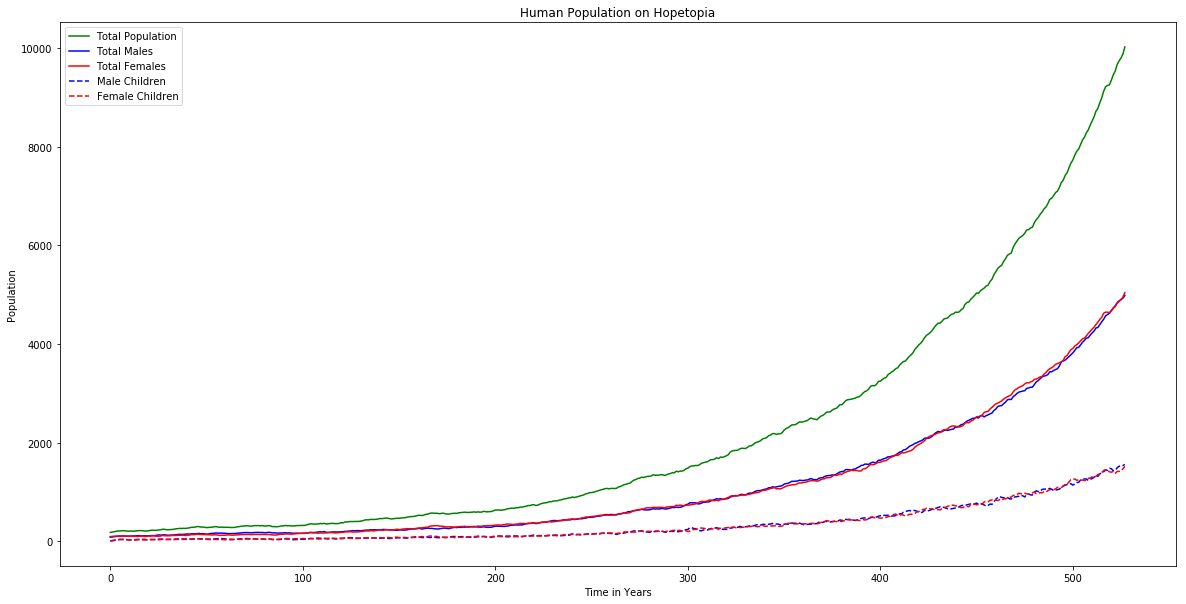

In [17]:
plt.figure(figsize=(20,10))

#Labels
plt.xlabel('Time in Years')
plt.ylabel('Population')
plt.title('Human Population on Hopetopia')

#Plotting curves
# plt.plot(tX, tY, 'g-', mX, mY, 'b-', fX, fY, 'r-') #Plotting curves for total pop (in green) / male pop (in blue) / female pop (in red)
tot, = plt.plot(tX, tY, 'g-', label = "Total Population")
m, = plt.plot(mX, mY, 'b-', label = "Total Males")
f, = plt.plot(fX, fY, 'r-', label = "Total Females")
mc, = plt.plot(mcX, mcY, 'b--', label = "Male Children")
fc, = plt.plot(fcX, fcY, 'r--', label = "Female Children")


#Legend
plt.legend(handles = [tot, m, f, mc, fc])

plt.show()